# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
data.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
print(data.head())
print(data.info())
print(data.describe())  
print(data.isnull().sum())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null    

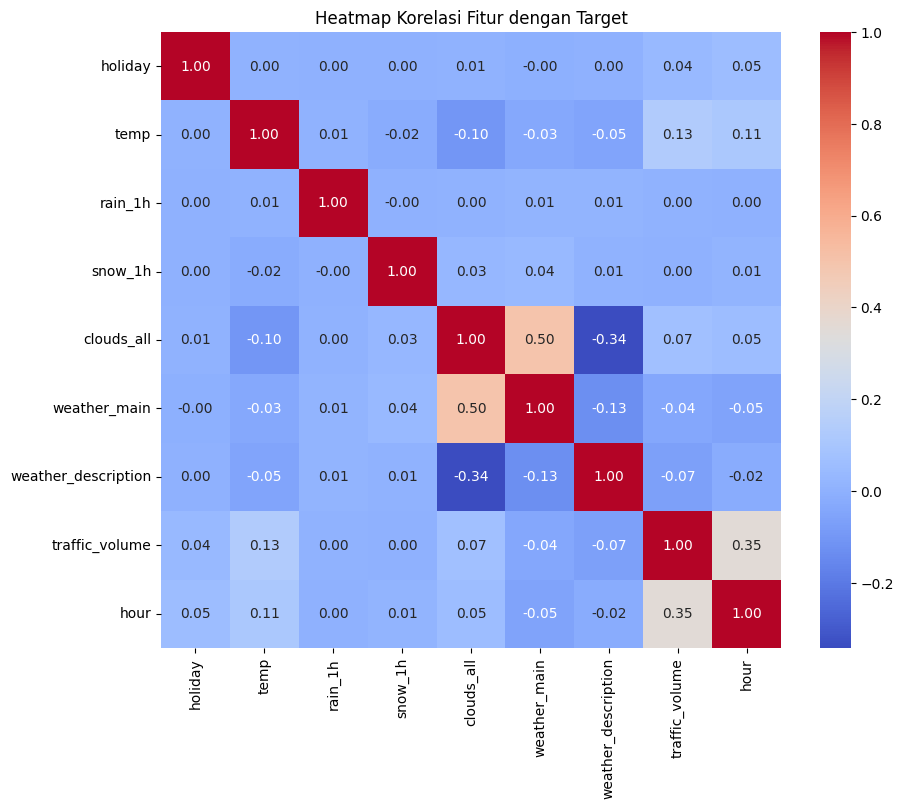

Korelasi tiap fitur dengan 'traffic_volume':
traffic_volume         1.000000
hour                   0.352401
temp                   0.130299
clouds_all             0.067054
holiday                0.038057
rain_1h                0.004714
snow_1h                0.000733
weather_main          -0.040151
weather_description   -0.067507
Name: traffic_volume, dtype: float64


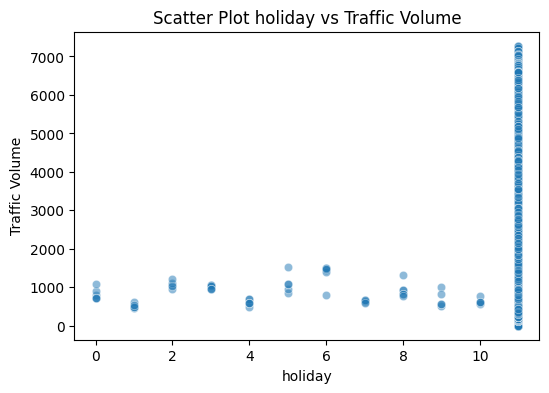

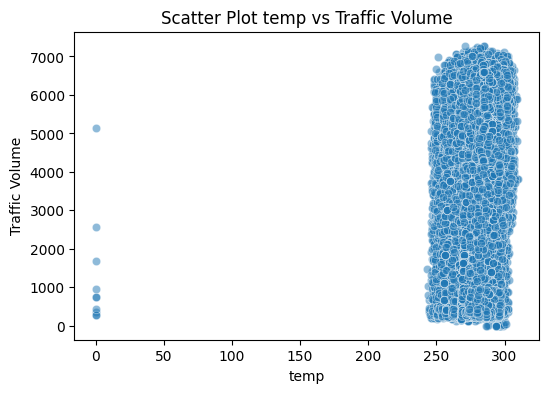

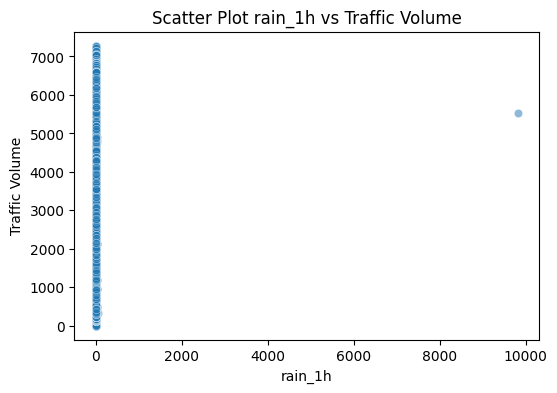

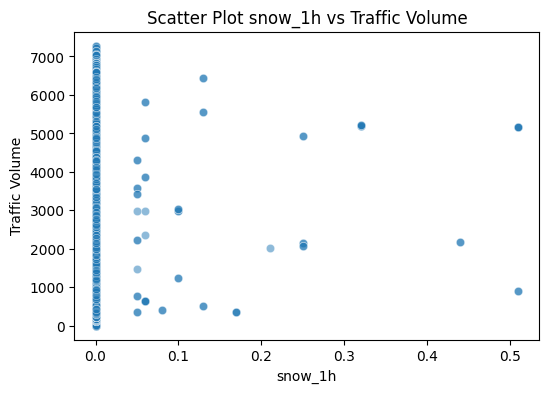

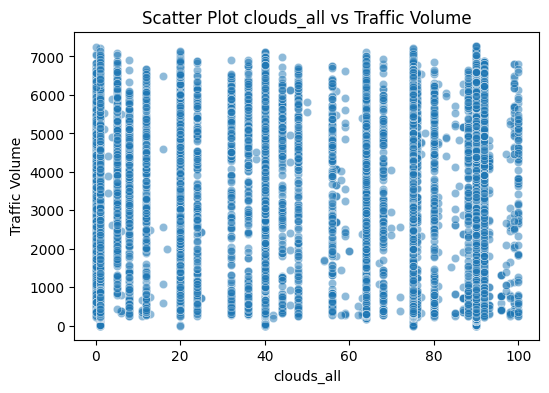

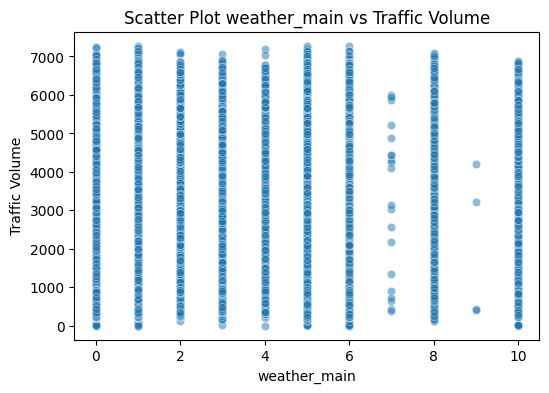

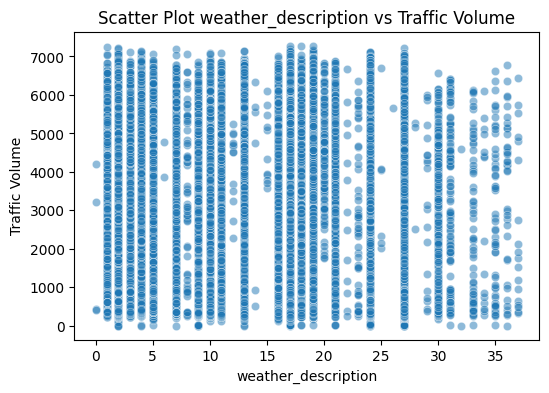

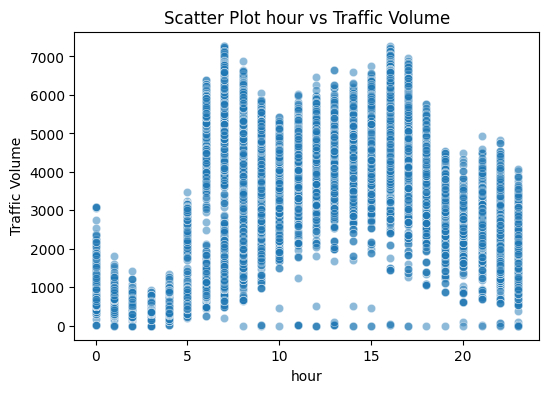

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()
data_encoded['date_time'] = pd.to_datetime(data_encoded['date_time'])
data_encoded['hour'] = data_encoded['date_time'].dt.hour
data_encoded = data_encoded.drop(columns=['date_time'])

categorical_columns = ['holiday', 'weather_main', 'weather_description']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le  

correlation_matrix = data_encoded.corr()
correlation_with_target = correlation_matrix['traffic_volume'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Heatmap Korelasi Fitur dengan Target')
plt.show()

print("Korelasi tiap fitur dengan 'traffic_volume':")
print(correlation_with_target)

features = [col for col in data_encoded.columns if col != 'traffic_volume']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data_encoded[feature], y=data_encoded['traffic_volume'], alpha=0.5)
    plt.title(f'Scatter Plot {feature} vs Traffic Volume')
    plt.xlabel(feature)
    plt.ylabel('Traffic Volume')
    plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
data = data.copy()
def replace_out_of_range_with_median(data, valid_ranges):
    data = data.copy()
    
    for col, (min_val, max_val) in valid_ranges.items():
        valid_median = data[
            (data[col] >= min_val) & (data[col] <= max_val)
        ][col].median()

        data[col] = data[col].apply(
            lambda x: valid_median if not (min_val <= x <= max_val) else x
        )
    return data

def clean_categorical_columns(data, categorical_cols):    
    data[categorical_cols] = data[categorical_cols].apply(
        lambda x: x.astype(str).str.strip().str.lower()
    )
    return data

def convert_comma_to_float(data, columns):
    for col in columns:
        data[col] = data[col].replace(',', '.', regex=True).astype(float)
    return data

def handle_outlier_iqr_capping(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    valid_min = data[
        (data[column] >= lower_bound) & (data[column] <= upper_bound)
    ][column].min()

    valid_max = data[
        (data[column] >= lower_bound) & (data[column] <= upper_bound)
    ][column].max()

    data[column] = data[column].apply(
        lambda x: valid_min if x < lower_bound else (valid_max if x > upper_bound else x)
    )

    return data

if __name__ == "__main__":
    valid_ranges = {
        'temp': (200, 350),
        'rain_1h': (0, 500),
        'snow_1h': (0, 500),
        'clouds_all': (0, 100),
        'traffic_volume': (0, 100000),
    }

    categorical_cols = ['weather_main', 'holiday', 'weather_description']
    float_cols = ['rain_1h', 'snow_1h']

    # Pipeline preprocessing
    data_cleaned = replace_out_of_range_with_median(data, valid_ranges)
    data_cleaned = clean_categorical_columns(data_cleaned, categorical_cols)
    data_cleaned = convert_comma_to_float(data_cleaned, float_cols)
    data_cleaned = handle_outlier_iqr_capping(data_cleaned, 'temp')
    print("Missing values:")
    print(data_cleaned.isnull().sum())

    # Simpan hasil
    data_cleaned.to_csv("data_ready.csv", index=False)


Missing values:
holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64
